In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [182]:
 train=pd.read_csv('train.csv')


In [183]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [184]:
train.columns



Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

 Exploratory Data Analysis

In [185]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

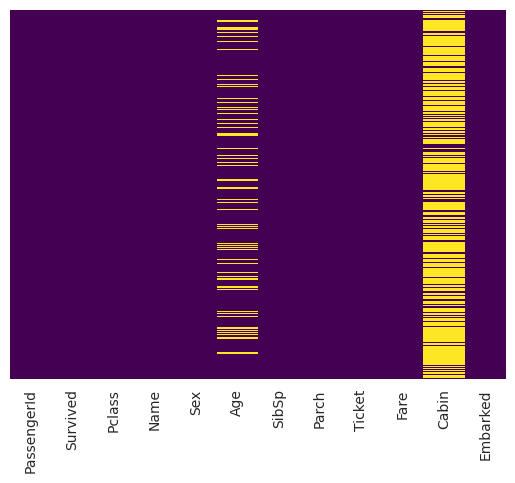

In [186]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

The proportion of missing values in the 'Age' column is likely small enough to be reasonably replaced with some form of imputation.

<Axes: xlabel='Survived', ylabel='count'>

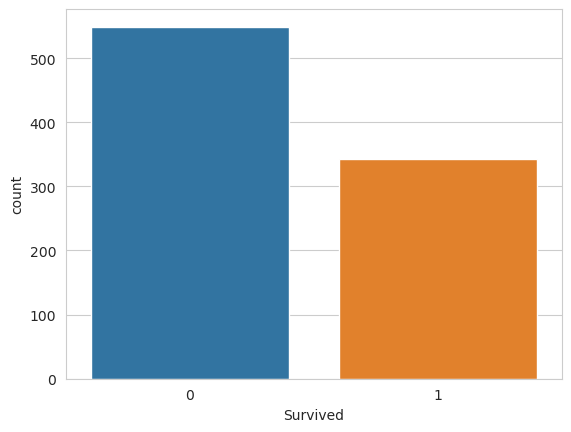

In [187]:
sns.set_style('whitegrid')
sns.countplot(x="Survived",data=train)

<Axes: xlabel='Survived', ylabel='count'>

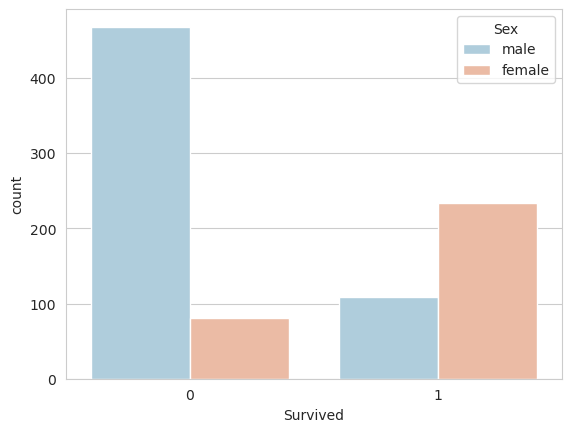

In [188]:
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

From the above graph, we can interpret that the count of females who survived is higher than that of males.

In [189]:
train['Pclass'] = train['Pclass'].astype(str)

<Axes: xlabel='Survived', ylabel='count'>

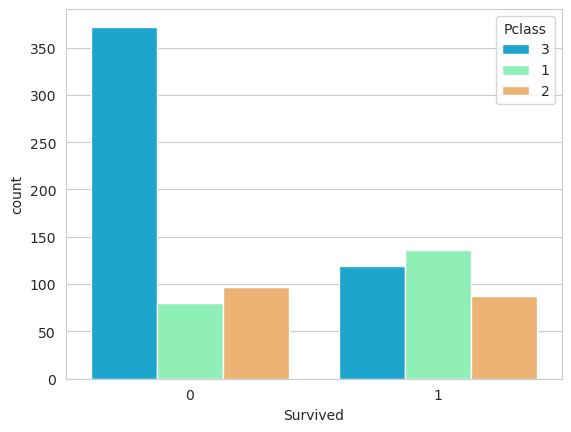

In [190]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')


<Axes: >

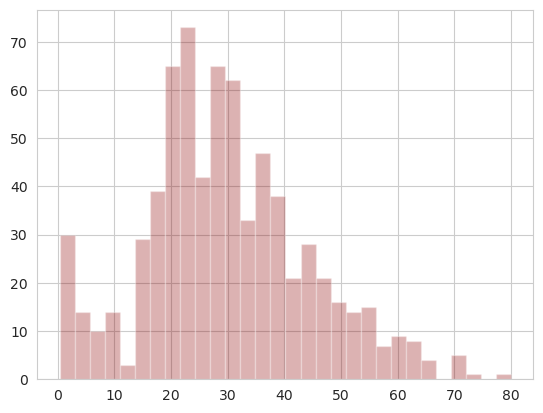

In [119]:
train['Age'].hist(bins=30,color='darkred',alpha=0.3)

<Axes: xlabel='SibSp', ylabel='count'>

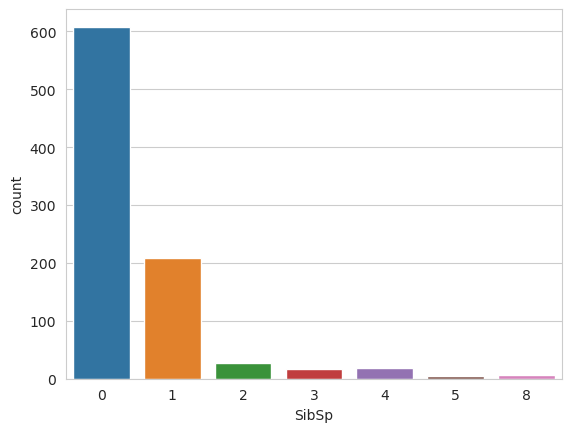

In [191]:
sns.countplot(x='SibSp',data=train)

<Axes: >

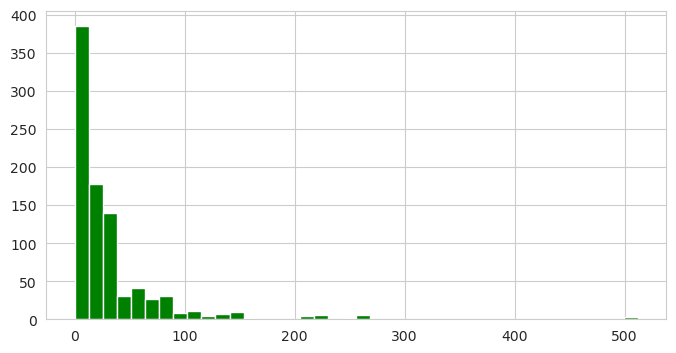

In [192]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

In [193]:
Data Cleaning

SyntaxError: invalid syntax (365056939.py, line 1)

<Axes: xlabel='Pclass', ylabel='Age'>

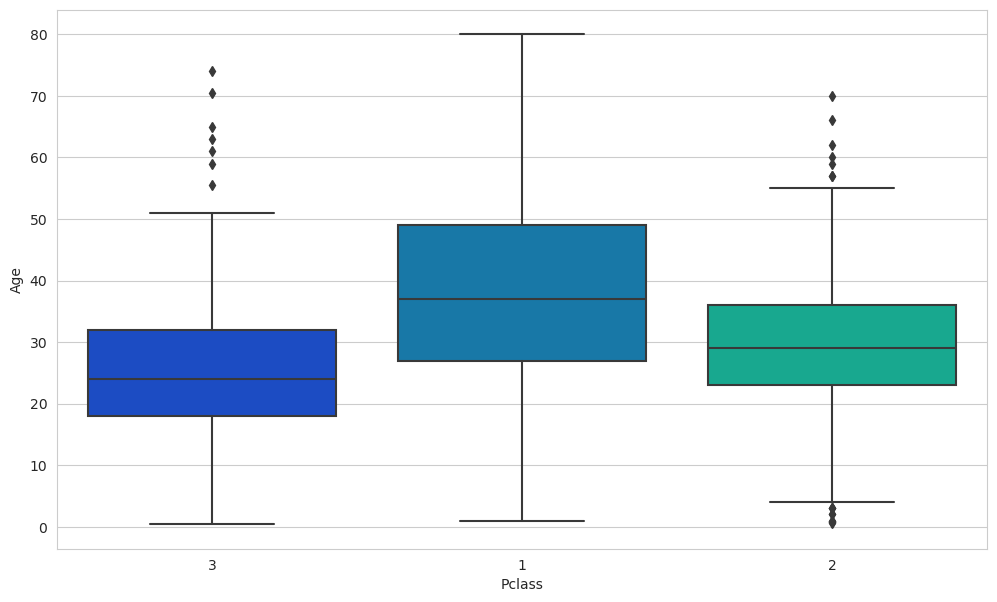

In [194]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')


In [195]:
def impute_age(cols):
    Age = cols.iloc[0]
    Pclass = cols.iloc[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age
        

In [196]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

<Axes: >

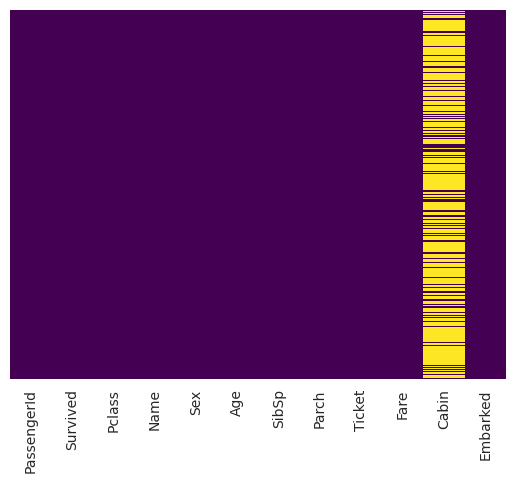

In [197]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [198]:
train.drop('Cabin',axis=1,inplace=True)

In [199]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<Axes: >

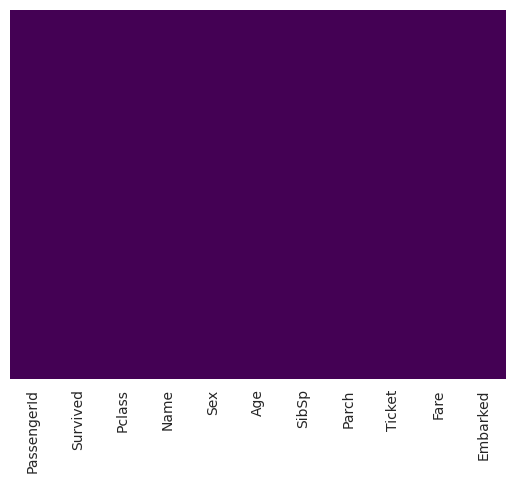

In [200]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [201]:
sex = pd.get_dummies(train['Sex'], drop_first=True)
sex = sex.astype(int)
# Create dummy variables for 'Embarked' column
embark = pd.get_dummies(train['Embarked'], drop_first=True)
embark = embark.astype(int)
# Print the first few rows to check
print(sex.head())
print(embark.head())

   male
0     1
1     0
2     0
3     0
4     1
   Q  S
0  0  1
1  0  0
2  0  1
3  0  1
4  0  1


In [202]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)


In [203]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [204]:
train=pd.concat([train,sex,dummies],axis=1)


In [205]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


Building Logistic Regression model


Train test Split


In [206]:
train.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [207]:
train['Survived'].head()


0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [208]:
from sklearn.model_selection import train_test_split








In [209]:
x_train,x_test,y_train,y_test=train_test_split(train.drop('Survived',axis=1),train['Survived'],test_size=0.30,random_state=101)

Training and predicting

In [210]:
from sklearn.linear_model import LogisticRegression


In [212]:
from sklearn.preprocessing import StandardScaler

In [213]:
logmodel=LogisticRegression(max_iter=1000)
logmodel.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [216]:
predictions=logmodel.predict(x_test)

In [217]:
from sklearn.metrics import confusion_matrix

In [218]:
accuracy=confusion_matrix(y_test,predictions)

In [219]:
accuracy

array([[135,  19],
       [ 39,  75]])

In [220]:
from sklearn.metrics import accuracy_score



In [221]:
acc=accuracy_score(y_test,predictions)
print(acc)


0.7835820895522388
